In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from network_model import *
from data import *
from Weather import Weather

In [4]:
SIZE_OF_INPUT = 7
NUMBER_OF_NEURALS = 2

In [6]:
train_data = get_data()
weather = Weather(
    train_data["Avg_Temp"].to_numpy(),
    train_data["Min_Temp"].to_numpy(),
    train_data["Max_Temp"].to_numpy(),
    train_data["Sum_Fall"].to_numpy(),
    train_data["Kind_of_Fall"].to_numpy()
)

weather.temp_avg = standardize(weather.temp_avg ,weather.temp_avg)
weather.temp_min = standardize(weather.temp_min ,weather.temp_avg)
weather.temp_max = standardize(weather.temp_max ,weather.temp_avg)

x_train = np.concatenate((
    weather.temp_avg.reshape(-1, 1),
    weather.temp_min.reshape(-1, 1),
    weather.temp_max.reshape(-1, 1),
    weather.fall.reshape(-1, 1),
    weather.k_fall.reshape(-1, 1)
), axis=1)

y_train = x_train[1:, [0]]

network = NeuralNetwork(x_train[0:SIZE_OF_INPUT].T, y_train[0:SIZE_OF_INPUT], NUMBER_OF_NEURALS)

In [7]:
SIZE_OF_PLOT = len(x_train)-100
y_output = np.zeros(SIZE_OF_PLOT)
y_pred = np.zeros(SIZE_OF_PLOT)
for i in range(SIZE_OF_PLOT):
    network.train(x_train[i:i+SIZE_OF_INPUT].T, y_train[i+SIZE_OF_INPUT])
    y_output[i] = y_train[i+SIZE_OF_INPUT]
    y_pred[i] = network.output[0]

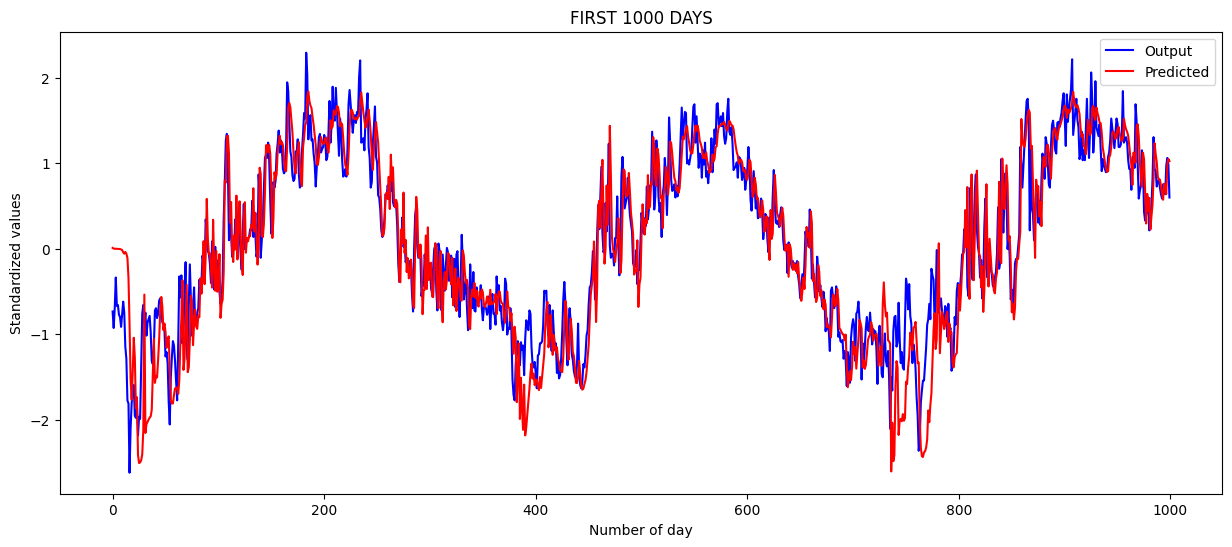

In [8]:
LENGHT = 1000

plt.figure(figsize=(15,6))
plt.title("FIRST 1000 DAYS")
plt.xlabel("Number of day")
plt.ylabel("Standardized values")

x = np.arange(LENGHT)
plt.plot(x, y_output[:LENGHT], 'b', label="Output")
plt.plot(x, y_pred[:LENGHT], 'r', label="Predicted")
plt.legend()
plt.show()

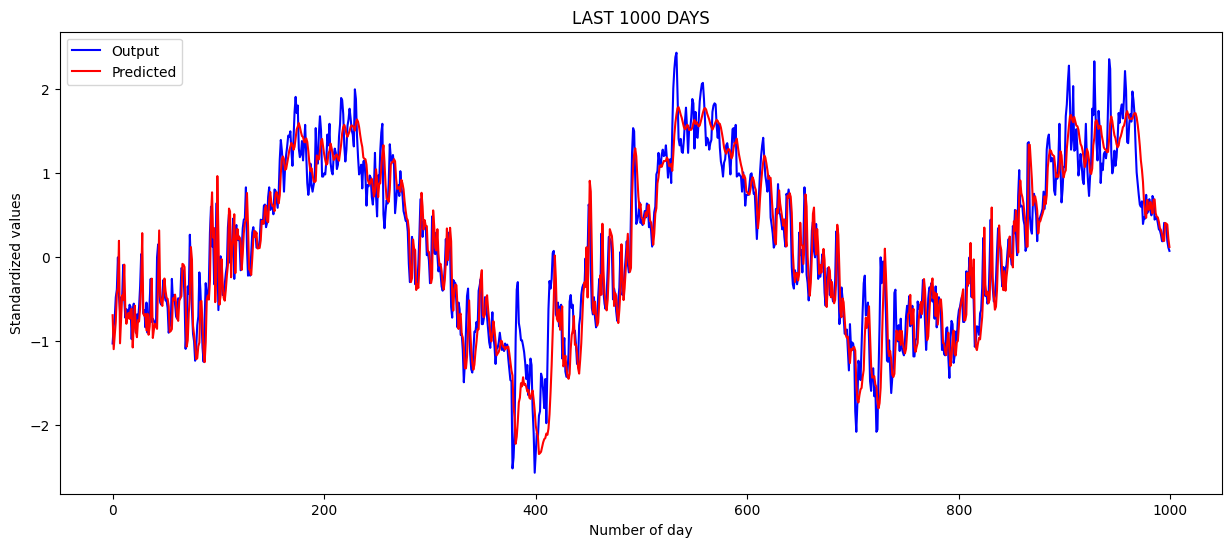

In [9]:
plt.figure(figsize=(15,6))
plt.title("LAST 1000 DAYS")
plt.xlabel("Number of day")
plt.ylabel("Standardized values")

x = np.arange(LENGHT)
plt.plot(x, y_output[-LENGHT:], 'b', label="Output")
plt.plot(x, y_pred[-LENGHT:], 'r', label="Predicted")
plt.legend()
plt.show()

In [7]:
print(f"MSE: {network.mse(y_output, y_pred)}")
print(f"MAE: {network.mae(y_output, y_pred)}")

MSE: 0.14907774453311315
MAE: 0.2816303028142042


# Predicting value

In [8]:
x_test = np.array([7,5,4,4,6,7,10])
x_test = np.reshape(x_test, (1, np.shape(x_test)[0]))
x_test = standardize(x_test, x_train_org)
network.predict(x_test)
print(unstandardize(network.output, x_train_org))

NameError: name 'x_train_org' is not defined